In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('train.csv', index_col = "PassengerId")

# Context

In [35]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


# Data quality assessment

#### Number of raws and columns:

In [36]:
print("There are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns in DataFrame.")

There are 100000 rows and 11 columns in DataFrame.


#### Number of NaN values in each column:

In [37]:
print(df.isna().sum())

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64


#### The missing numerical characteristics are dropped

In [38]:
df = df.dropna() 

#### For convenience, we will cast "Age" to type int and left only the first letter of "Cabin"

In [55]:
df["Age"] = df.Age.astype(int)
df["Fare"] = df.Fare.astype(int)
df["Cabin"] = df["Cabin"].apply(lambda s: s[0])

# Data exploration

##   1. Age statistics

###   1.1  Average age groupped by different columns.

In [40]:
print("Average of age separated by Sex: ")
print(df.groupby('Sex')["Age"].mean())
print("\nAverage of age separated by Pclass: ")
print(df.groupby('Pclass')["Age"].mean())
print("\nAverage of age separated by Pclass and Sex: ")
print(df.groupby(['Pclass', 'Sex'])["Age"].mean())

Average of age separated by Sex: 
Sex
female    46.605823
male      41.949524
Name: Age, dtype: float64

Average of age separated by Pclass: 
Pclass
1    45.142588
2    43.422644
3    39.425532
Name: Age, dtype: float64

Average of age separated by Pclass and Sex: 
Pclass  Sex   
1       female    47.221015
        male      42.459596
2       female    44.509251
        male      41.188406
3       female    41.623472
        male      37.931006
Name: Age, dtype: float64


###   1.2  Passanger age distribution.

Text(0.5, 1.0, 'Passenger age distribution')

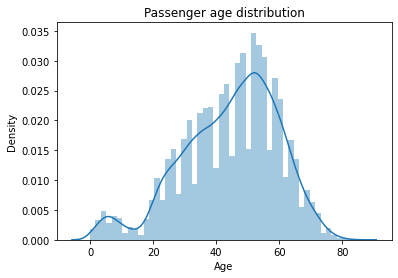

In [41]:
sns.distplot(df.Age)
plt.title("Passenger age distribution")

### 1.3  Passenger age distribution for each Pclass

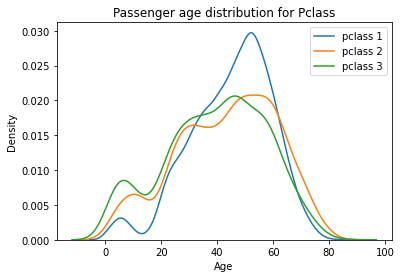

In [42]:
plt.title("Passenger age distribution for Pclass")
sns.kdeplot(df[df.Pclass == 1].Age, label = "pclass 1")
sns.kdeplot(df[df.Pclass == 2].Age, label = "pclass 2")
sns.kdeplot(df[df.Pclass == 3].Age, label = "pclass 3")
plt.legend()

### 1.4  Passenger survival rate distribution for each Age

Text(0.5, 1.0, 'Survival rate for Age:')

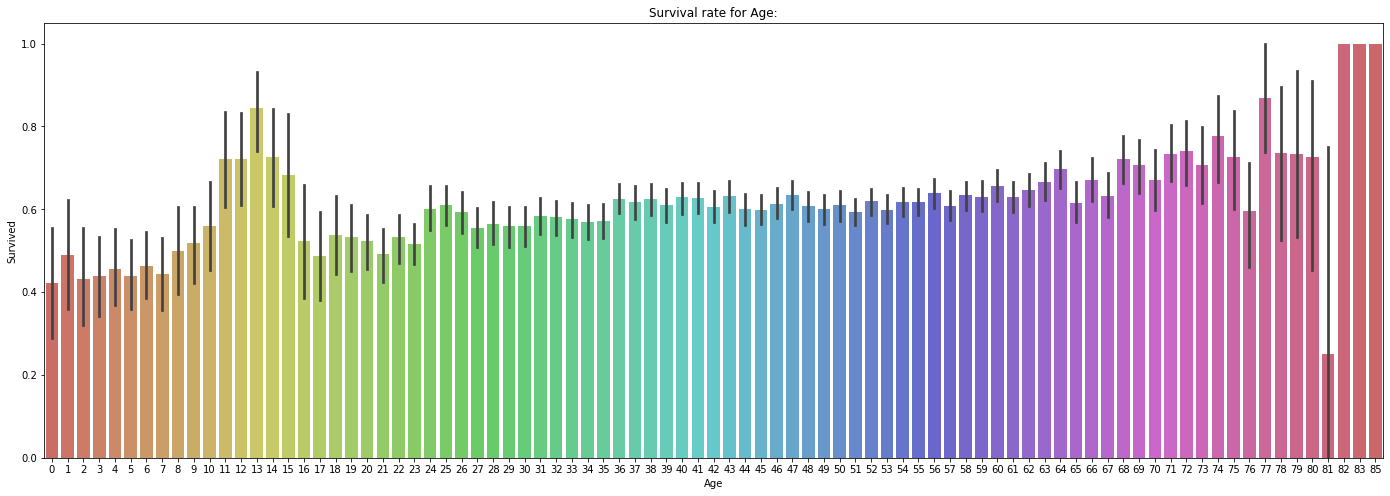

In [43]:
plt.figure(figsize = (24, 8))
sns.barplot(x = df.Age, y = df.Survived, palette = "hls")
plt.title("Survival rate for Age:")

## 2. Gender statistics

### 2.1  Gender groupped by different columns.

In [44]:
print("Number of men and women: ")
print(df.Sex.value_counts())
print("\nAverage fare for men and women:")
print(df.groupby('Sex')["Fare"].mean())
print("\nNumber of Parch for men and women:")
print(df.groupby('Sex')["Parch"].sum())
print("\nNumber of SibSp for men and women:")
print(df.groupby('Sex')["SibSp"].sum())

Number of men and women: 
female    17449
male      13432
Name: Sex, dtype: int64

Average fare for men and women:
Sex
female    98.226657
male      81.454167
Name: Fare, dtype: float64

Number of Parch for men and women:
Sex
female    8979
male      8289
Name: Parch, dtype: int64

Number of SibSp for men and women:
Sex
female    7063
male      7822
Name: SibSp, dtype: int64


### 2.2  Percentage of survivors for gender.

Text(0.5, 1.0, 'Percentage of survivors for gender')

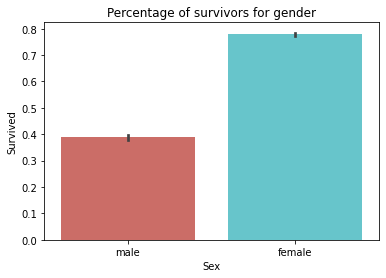

In [45]:
sns.barplot(x = df.Sex, y = df.Survived, palette = "hls")
plt.title("Percentage of survivors for gender")

### 2.3  Dependence between Pclass, survival and gender

Text(0.5, 1.0, 'Dependence between Pclass, survival and gender')

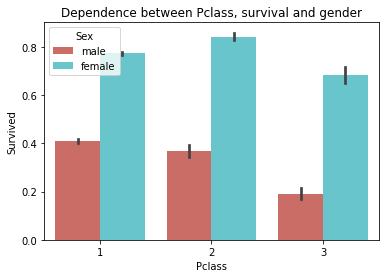

In [46]:
sns.barplot(x = df["Pclass"], y = df["Survived"], hue = df["Sex"], palette = "hls")
plt.title("Dependence between Pclass, survival and gender")

## 3. Pclass statistics

### 3.1  Pclass groupped by different columns.

In [63]:
print("Average fare for each Pclass:")
print(df.groupby('Pclass')["Fare"].mean())

Average fare for each Pclass:
Pclass
1    99.497489
2    46.309129
3    49.825829
Name: Fare, dtype: float64


### 3.2  Survival rate for each Pclass.

Text(0.5, 1.0, 'Percentage of survivors for each Pclass')

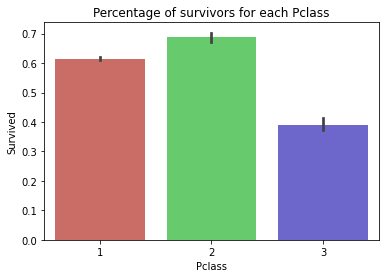

In [64]:
sns.barplot(x = df.Pclass, y = df.Survived, palette = "hls")
plt.title("Percentage of survivors for each Pclass")

### 3.3  Dependence between Pclass, survival and embarked town ?

Text(0.5, 1.0, 'Dependence between Pclass, survival and embarked town')

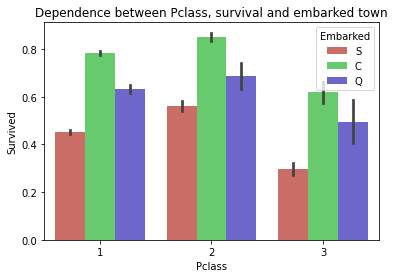

In [65]:
sns.barplot(x = df["Pclass"], y = df["Survived"], hue = df["Embarked"], palette = "hls")
plt.title("Dependence between Pclass, survival and embarked town")

## Other statistics

### Dependence between Age and fare. Groupped by survived or not.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

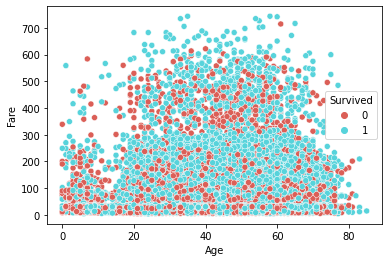

In [70]:
sns.scatterplot(x = df["Age"], y = df["Fare"], hue = df["Survived"], palette = "hls")

### Percentage of survivors for each embarked town

Text(0.5, 1.0, 'Percentage of survivors for each embarked town')

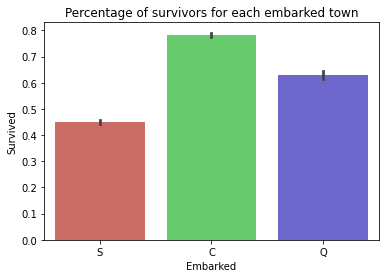

In [71]:
sns.barplot(x = df.Embarked, y = df.Survived, palette='hls')
plt.title("Percentage of survivors for each embarked town")

### Percentage of survivors for each cabin

Text(0.5, 1.0, 'Percentage of survivors for each cabin')

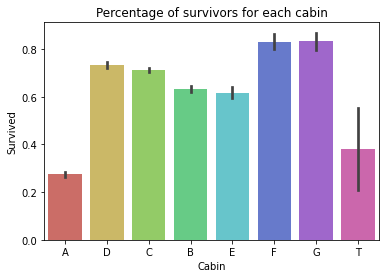

In [68]:
sns.barplot(x = df.Cabin, y = df.Survived, palette='hls')
plt.title("Percentage of survivors for each cabin")

# Summary

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,1,"Wardlaw, Michael",male,27,2,1,474849,73.02,A7253,S
9,0,2,"Greigo, Rudy",male,66,0,0,6981,9.14,D2969,C
11,0,1,"Telschow, Robert",male,60,0,0,19600,31.50,A9055,S
12,0,3,"Stewart, Pat",male,36,0,0,434108,9.34,C8674,S
14,1,1,"Seaton, Karen",female,44,0,1,12425,28.40,D6945,C
...,...,...,...,...,...,...,...,...,...,...,...
99967,0,1,"Harrier, Stacey",male,49,2,0,402064,225.51,A4590,S
99989,1,1,"Harris, Amy",female,64,0,1,27728,31.66,D12975,C
99991,0,1,"Hogan, Todd",male,53,0,5,CA 48075,30.09,B19289,Q
